# 01. Neural Network Regression with TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
Predict the coordinates of a bounding box of an item in an image.
Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).
In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

## Creating to view and fit

Text(0, 0.5, 'label')

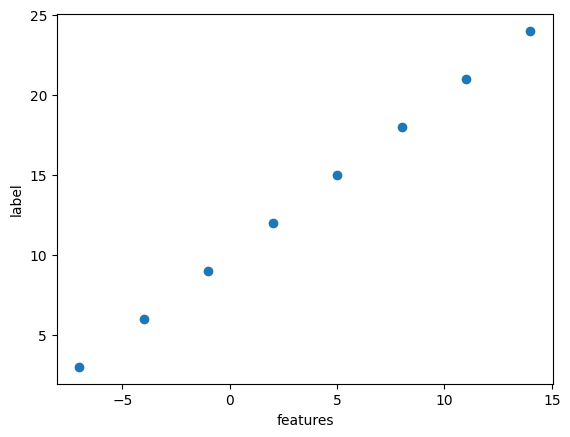

In [ ]:
#Creating featurs
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#creating labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(x,y)
plt.xlabel("features")
plt.ylabel("label")

In [ ]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

In [ ]:
#Create a tensor for our demo housing price prediction

housing_info = tf.constant(["bedroom","bathroom","garage"])
housing_price = tf.constant(976000)

housing_info , housing_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=976000>)

In [ ]:
# Take a single example of X
input_shape = x[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

In [ ]:
x[0] , y[0]

(-7.0, 3.0)

In [ ]:
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Take a single example of X
input_shape = x[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

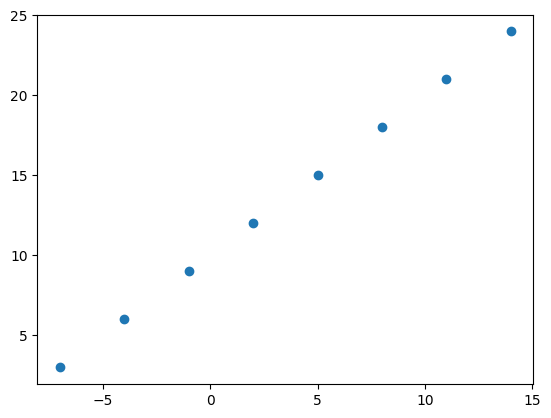

In [ ]:
plt.scatter(x,y)

#Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

Fitting a model - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

# Compile the TensorFlow neural network model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae'],
    
)
# x = x.reshape(-1, 1)
# Fit the TensorFlow neural network model
model.build((None, 1))
model.summary()
model.fit(x,y, epochs=10)


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 16        
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 1s 778ms/step - loss: 12.1733 - mae: 12.1733
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 12.1380 - mae: 12.1380
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 12.1025 - mae: 12.1025
Epoch 4/10
1/1 [======================

#Improving a model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

        1) Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
        2) Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
        3) Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
!pip install keras-tuner
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=8, max_value=64, step=8),
                                 activation='relu', input_shape=(1,)))
    model.add(keras.layers.Dense(units=hp.Int('units_2', min_value=8, max_value=64, step=8),
                                 activation='relu'))
    model.add(keras.layers.Dense(units=hp.Int('units_3', min_value=50, max_value=100, step=4),
                                 activation='relu'))
    model.add(keras.layers.Dense(units=hp.Int('units_4', min_value=50, max_value=100, step=4),
                                 activation='relu'))
    model.add(keras.layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mae',
        metrics=['mae'])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

# Train the tuner
tuner.search(x, y,
             epochs=100,
             validation_split=0.2)

# Print the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Optimal number of units in the first layer: {best_hps.get("units_1")}')
print(f'Optimal number of units in the second layer: {best_hps.get("units_2")}')
print(f'Optimal number of units in the third layer: {best_hps.get("units_3")}')
print(f'Optimal number of units in the fourth layer: {best_hps.get("units_4")}')
print(f'Optimal learning rate: {best_hps.get("learning_rate")}')

# Build the model with the optimal hyperparameters and fit to the entire dataset
modell = tuner.hypermodel.build(best_hps)
modell.fit(x, y, epochs=100)
final_loss = model.evaluate(x, y)
print(f'Final loss: {final_loss}')


Trial 10 Complete [00h 00m 33s]
val_loss: 17.759626388549805

Best val_loss So Far: 0.09376748402913411
Total elapsed time: 00h 05m 28s
Optimal number of units in the first layer: 24
Optimal number of units in the second layer: 40
Optimal number of units in the third layer: 66
Optimal number of units in the fourth layer: 78
Optimal learning rate: 0.01
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.7308 - mae: 13.7308
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.6474 - mae: 12.6474
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6348 - mae: 11.6348
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6242 - mae: 10.6242
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.1587 - mae: 9.1587
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 7.0629 - mae: 7.0629
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 4.1756 - m

In [ ]:
x_pred = np.array([17.0]).reshape(-1, 1)

# Make prediction
y_pred = model.predict(x_pred)

# Print prediction
print(y_pred)

1/1 [==============================] - 0s 62ms/step
[[7.9688582]]


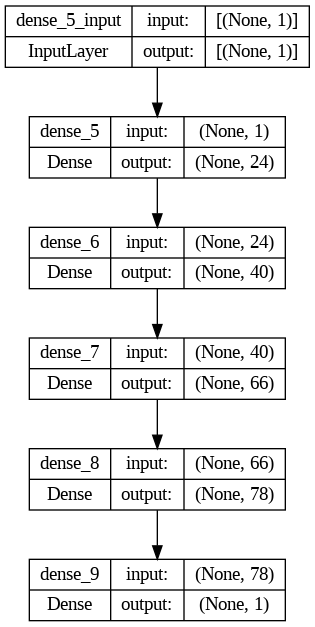

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(modell, show_shapes=True)

In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

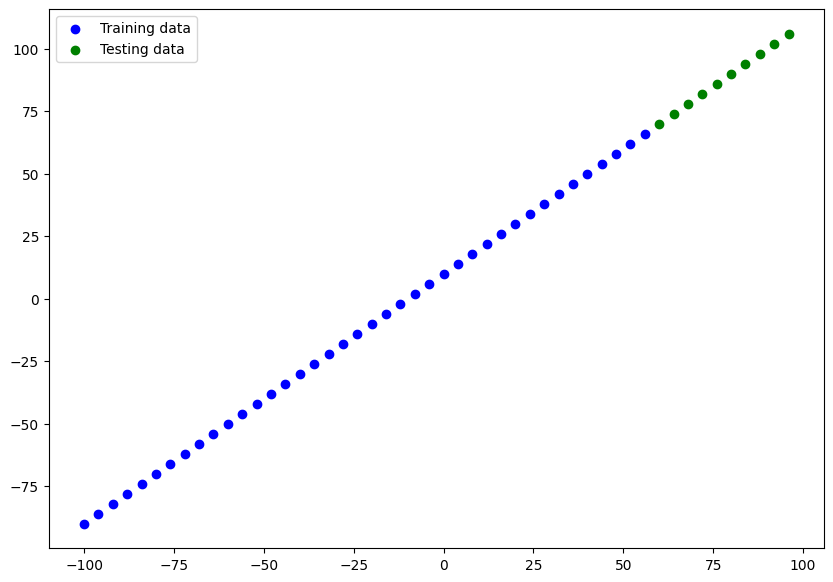

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)
     


In [ ]:
# Doesn't work (model not fit/built)
# model.summary()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1],name = "input_layer"),
  # tf.keras.layers.Dense(97,name = "hidden_layer_1"),
  # tf.keras.layers.Dense(64,name = "hidden_layer_2"),
  # tf.keras.layers.Dense(28,name = "hidden_layer_3"),
  tf.keras.layers.Dense(1,name = "output_layer") # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])

In [ ]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

      Total params - total number of parameters in the model.
      Trainable parameters - these are the parameters (patterns) the model can update as it trains.
      Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

For a more in-depth overview of the trainable parameters within a layer, you can check out MIT's introduction to deep learning video.

To experiment with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)), you can see how it changes the Total/Trainable params. The number of trainable parameters changes because each neuron in the layer has its own weight and bias parameter. Therefore, more neurons mean more parameters to train, resulting in a higher number of trainable parameters. 

Now let's fit our model to the training data.


In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1) # verbose controls how much gets output

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 6155.8438 - mse: 6155.8438
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 6047.9580 - mse: 6047.9580
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 5943.6484 - mse: 5943.6484
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 5839.2891 - mse: 5839.2891
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 5739.9131 - mse: 5739.9131
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 5639.3188 - mse: 5639.3188
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 5539.3257 - mse: 5539.3257
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 5434.5298 - mse: 5434.5298
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 5344.7295 - mse: 5344.7295
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 5251.6333 - mse: 5251.6333
Epoch 11/100
2/2 

In [ ]:
# Check the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


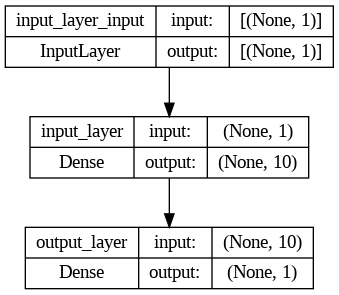

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

#Visualizing the predictions
Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [ ]:
X_test

array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])

In [ ]:
#Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 59ms/step


array([[22.801094],
       [24.355125],
       [25.909159],
       [27.463192],
       [29.017225],
       [30.571262],
       [32.125298],
       [33.679333],
       [35.233368],
       [36.787395]], dtype=float32)

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

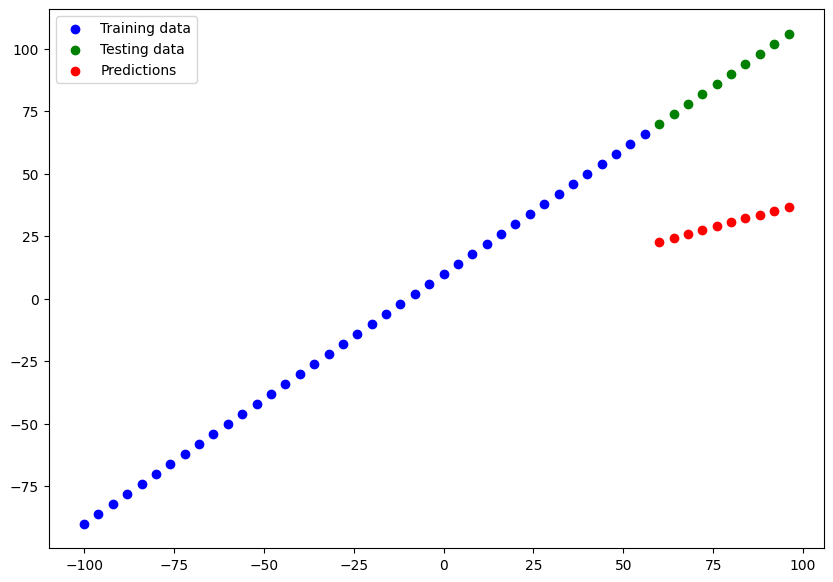

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

#Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

      Mean absolute error (MAE) - the mean difference between each of the predictions.
      Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
      The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
 # Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 123ms/step - loss: 3437.2676 - mse: 3437.2676


[3437.267578125, 3437.267578125]

In [ ]:

# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([65.198906, 63.644875, 62.090843, 60.536804, 58.982777, 57.42874 ,
       55.874702, 54.320667, 52.766632, 51.212605], dtype=float32)>

In [ ]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Check the predictions tensor values (notice the extra square brackets)
y_pred


array([[22.801094],
       [24.355125],
       [25.909159],
       [27.463192],
       [29.017225],
       [30.571262],
       [32.125298],
       [33.679333],
       [35.233368],
       [36.787395]], dtype=float32)

In [ ]:
# Check the tensor shapes
y_test.shape, y_pred.shape

((10,), (10, 1))

In [ ]:
# Shape before squeeze()
y_pred.shape

(10, 1)

In [ ]:
# Shape after squeeze()
y_pred.squeeze().shape
,     
# What do they look like?
y_test, y_pred.squeeze()
     

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([22.801094, 24.355125, 25.909159, 27.463192, 29.017225, 30.571262,
        32.125298, 33.679333, 35.233368, 36.787395], dtype=float32))

In [ ]:

# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=58.205757>

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=3437.2676>

In [ ]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=58.20575485229492>

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

#Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).
Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

      model_1 - same as original model, 1 layer, trained for 100 epochs.
      model_2 - 2 layers, trained for 100 epochs.
      model_3 - 2 layers, trained for 500 epochs.






##Build model_1

In [ ]:
#Set seed
tf.random.set_seed(42)

#Replicate Orignal Model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

#fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose = 0)

1/1 [==============================] - 0s 54ms/step


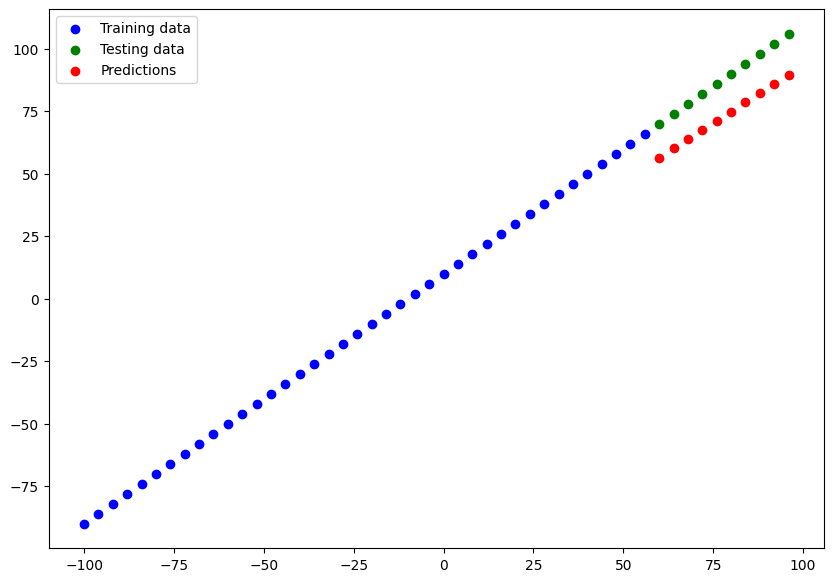

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(14.93721, 223.96143)

##Build model_2

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [ ]:
#Set seed
tf.random.set_seed(42)

#Replicate Orignal Model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#compile the model

model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

#fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose = 0)

1/1 [==============================] - 0s 88ms/step


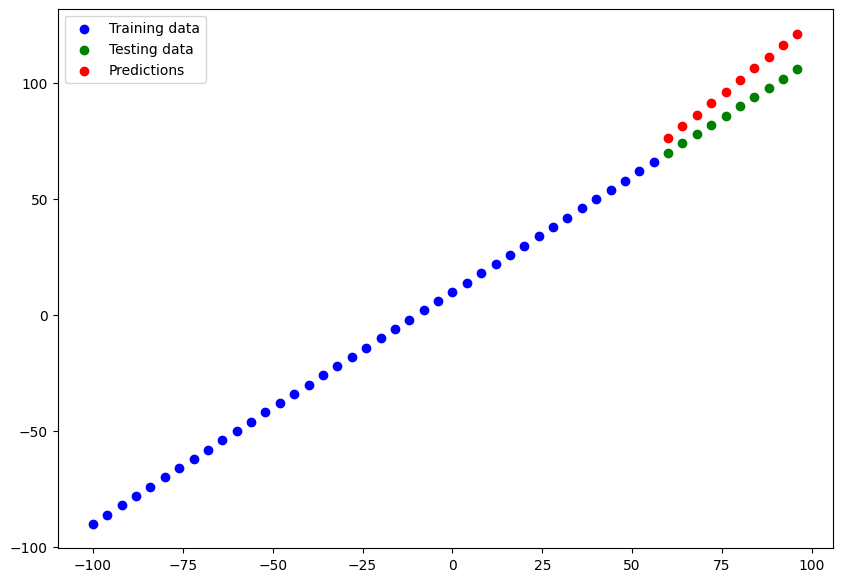

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2


(10.888692, 126.5073)

##Build model_3

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1],name = "input_layer"),
  tf.keras.layers.Dense(97,name = "hidden_layer_1"),
  # tf.keras.layers.Dense(64,name = "hidden_layer_2"),
  tf.keras.layers.Dense(28,name = "hidden_layer_3"),
  tf.keras.layers.Dense(1,name = "output_layer") # define the input_shape to our model
])

# Compile model (same as above)
model_3.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])
model_3.fit(X_train,y_train,epochs = 500)

Epoch 1/500
2/2 [==============================] - 2s 24ms/step - loss: 2867.2893 - mse: 2867.2893
Epoch 2/500
2/2 [==============================] - 0s 15ms/step - loss: 1828.2500 - mse: 1828.2500
Epoch 3/500
2/2 [==============================] - 0s 19ms/step - loss: 1049.6355 - mse: 1049.6355
Epoch 4/500
2/2 [==============================] - 0s 12ms/step - loss: 502.8058 - mse: 502.8058
Epoch 5/500
2/2 [==============================] - 0s 14ms/step - loss: 195.3398 - mse: 195.3398
Epoch 6/500
2/2 [==============================] - 0s 16ms/step - loss: 90.4542 - mse: 90.4542
Epoch 7/500
2/2 [==============================] - 0s 13ms/step - loss: 130.1140 - mse: 130.1140
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 241.2879 - mse: 241.2879
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 291.0605 - mse: 291.0605
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 282.6373 - mse: 282.6373
Epoch 11/500
2/2 [========

1/1 [==============================] - 0s 109ms/step


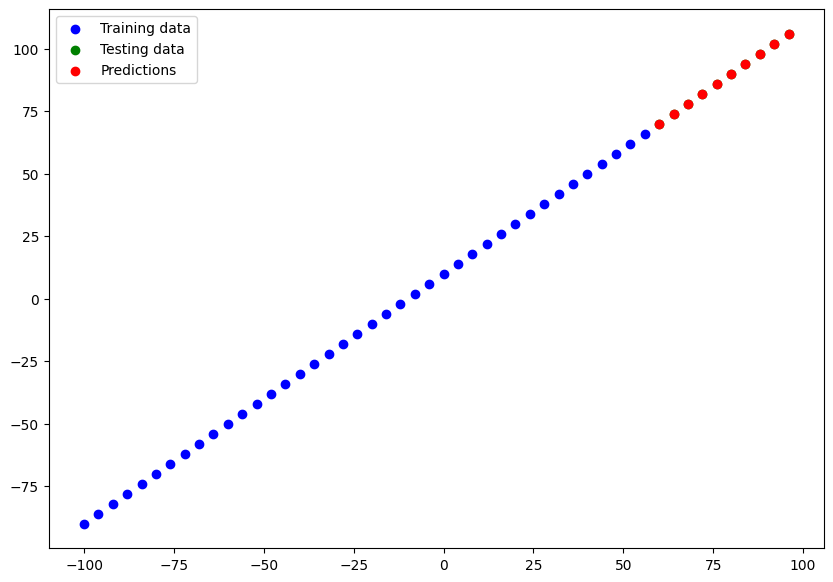

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(9.155274e-06, 1.1641532e-10)

#Comparing results
Now we've got results for 3 similar but slightly different results, let's compare them.

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.937210,223.961426
1,model_2,10.888692,126.507301
2,model_3,0.000009,0.000009


From our experiments, it looks like model_3 performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

    🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

#Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

    The SavedModel format (default).
    The HDF5 format.
    
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

In [ ]:
# Save a model using the SavedModel format
model_3.save('best_model_SavedModel_format')


In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [ ]:
# Save a model using the HDF5 format
model_3.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("/content/drive/MyDrive/colab notebooks/best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer_1 (Dense)      (None, 97)                1067      
                                                                 
 hidden_layer_3 (Dense)      (None, 28)                2744      
                                                                 
 output_layer (Dense)        (None, 1)                 29        
                                                                 
Total params: 3,860
Trainable params: 3,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_3 with the SavedModel version (should return True)
model_3_preds = model_3.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_3_preds.squeeze()).numpy()

1/1 [==============================] - 0s 81ms/step


True

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("/content/drive/MyDrive/colab notebooks/best_model_SavedModel_format")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer_1 (Dense)      (None, 97)                1067      
                                                                 
 hidden_layer_3 (Dense)      (None, 28)                2744      
                                                                 
 output_layer (Dense)        (None, 1)                 29        
                                                                 
Total params: 3,860
Trainable params: 3,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_3 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_3_preds.squeeze()).numpy()
     


1/1 [==============================] - 0s 37ms/step


True

#A Larger Example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.

    🔑 Note: When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.2 MB/s eta 0:00:00


In [18]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import  MinMaxScaler


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:

# Encode the categorical variables
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])

# Normalize the numerical variables
scaler = MinMaxScaler()
df[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'children', 'charges']])

# Print the normalized dataset
print("After Encoding and Normalization:")
print(df.head())


After Encoding and Normalization:
        age  sex       bmi  children  smoker  region   charges
0  0.021739    0  0.321227       0.0       1       3  0.251611
1  0.000000    1  0.479150       0.2       0       2  0.009636
2  0.217391    1  0.458434       0.6       0       2  0.053115
3  0.326087    1  0.181464       0.0       0       1  0.333010
4  0.304348    1  0.347592       0.0       0       1  0.043816


In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,3,0.251611
1,0.000000,1,0.479150,0.2,0,2,0.009636
2,0.217391,1,0.458434,0.6,0,2,0.053115
3,0.326087,1,0.181464,0.0,0,1,0.333010
4,0.304348,1,0.347592,0.0,0,1,0.043816


In [14]:
# Create X & y values
X = df.drop("charges", axis=1)
y = df["charges"]

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [19]:
# Set random seed
tf.random.set_seed(42)

# Define callbacks
early_stop = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min')
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='model_4.h5', monitor='val_loss', save_best_only=True)

# Create a model with batch normalization and dropout layers
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, input_shape=[6]),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.6),
  tf.keras.layers.Dense(1)
])

# Compile model
model_4.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])

# Fit the model with callbacks
history = model_4.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), callbacks=[early_stop, model_checkpoint])


Epoch 1/500
27/27 [==============================] - 29s 56ms/step - loss: 4.2079 - mse: 4.2079 - val_loss: 0.1088 - val_mse: 0.1088
Epoch 2/500
27/27 [==============================] - 1s 25ms/step - loss: 3.2564 - mse: 3.2564 - val_loss: 0.1443 - val_mse: 0.1443
Epoch 3/500
27/27 [==============================] - 1s 28ms/step - loss: 2.4528 - mse: 2.4528 - val_loss: 0.1420 - val_mse: 0.1420
Epoch 4/500
27/27 [==============================] - 1s 27ms/step - loss: 2.3587 - mse: 2.3587 - val_loss: 0.1254 - val_mse: 0.1254
Epoch 5/500
27/27 [==============================] - 0s 15ms/step - loss: 1.7158 - mse: 1.7158 - val_loss: 0.1474 - val_mse: 0.1474
Epoch 6/500
27/27 [==============================] - 0s 14ms/step - loss: 1.5643 - mse: 1.5643 - val_loss: 0.1301 - val_mse: 0.1301
Epoch 7/500
27/27 [==============================] - 0s 15ms/step - loss: 1.2978 - mse: 1.2978 - val_loss: 0.1162 - val_mse: 0.1162
Epoch 8/500
27/27 [==============================] - 1s 21ms/step - loss: 1

In [20]:
# Check the results of the insurance model
model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 0.0063 - mse: 0.0063


[0.006335601210594177, 0.006335601210594177]

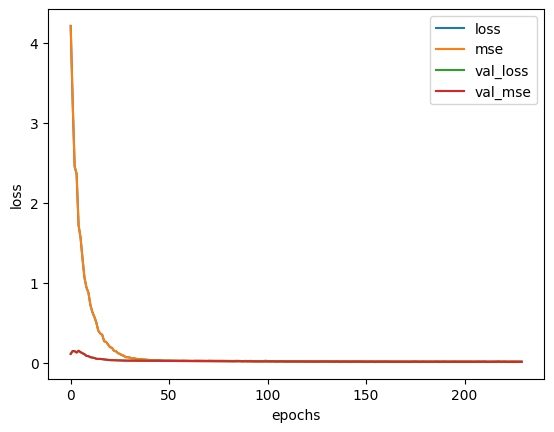

In [21]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

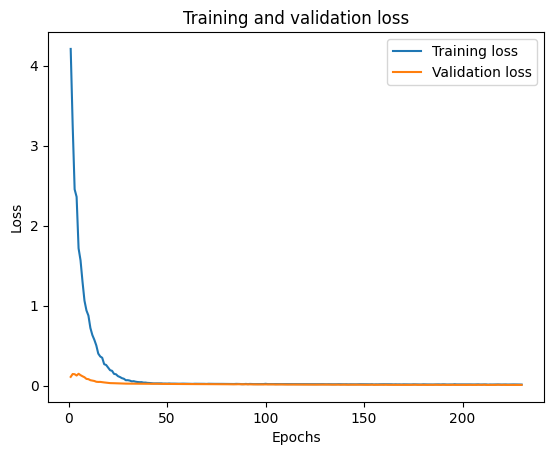

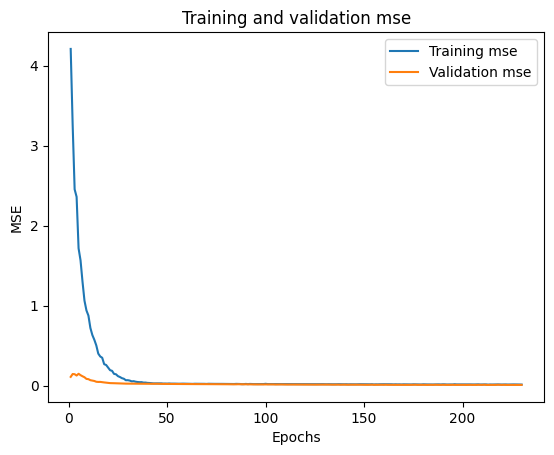

In [24]:
import seaborn as sns

# Plot training and validation loss over epochs
data = {'epochs': epochs, 'loss': loss, 'val_loss': val_loss}
sns.lineplot(x='epochs', y='loss', data=data, label='Training loss')
sns.lineplot(x='epochs', y='val_loss', data=data, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation mean squared error over epochs
mse = history.history['mse']
val_mse = history.history['val_mse']
data = {'epochs': epochs, 'mse': mse, 'val_mse': val_mse}
sns.lineplot(x='epochs', y='mse', data=data, label='Training mse')
sns.lineplot(x='epochs', y='val_mse', data=data, label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()
